## 作成したデータからRidge回帰を実施し、それぞれの特徴量の重要度を可視化する




In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy import stats
import shap

In [ ]:
# データの読み込み
import pandas as pd
df = pd.read_csv("learning_Li_battery_data.csv")

In [ ]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390
num_steps,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
nelements,3.000000,3.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max_delta_volume,0.008674,0.003674,0.078912,0.024693,0.071289,0.003949,0.051371,0.001674,0.042186,0.094216,...,0.022123,0.026178,0.000098,0.001096,0.010567,0.022063,0.091835,0.052291,0.015606,0.052717
average_voltage,3.645088,3.555958,3.637514,2.901634,3.757691,3.779085,2.425232,1.800780,3.371942,2.528926,...,5.069875,4.924767,4.925171,4.876715,3.373610,2.783307,3.273561,3.497992,3.531304,3.315288
capacity_grav,137.171754,69.825436,148.887306,184.256618,113.645161,72.350221,151.577130,140.718260,137.087631,43.511511,...,166.877457,83.438729,166.877457,27.921021,171.979543,39.974563,192.330534,141.941210,95.801349,180.599051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_dev local difference in SpaceGroupNumber,33.974522,22.156506,44.926378,37.717392,48.159064,22.316364,57.538390,7.871764,29.235926,23.356632,...,51.642827,56.158481,48.614866,47.062785,61.950518,64.813276,63.972552,62.349029,62.261096,63.335438
0-norm,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2-norm,0.630840,0.607362,0.699702,0.583095,0.695000,0.607362,0.716860,0.612372,0.622700,0.654654,...,0.707107,0.657231,0.707107,0.694863,0.764706,0.745356,0.761577,0.769309,0.769309,0.769309
frac s valence electrons,0.292135,0.298851,0.274390,0.350000,0.314159,0.303797,0.333333,0.225806,0.295455,0.128713,...,0.307692,0.316456,0.307692,0.309623,0.350515,0.352941,0.350877,0.350000,0.350000,0.350000


## 学習用データの準備

In [ ]:
# 数値データの抽出
df_num = df.select_dtypes(include=["float64", "int64"])

In [ ]:
# 目的変数の設定
target = "capacity_grav"

In [ ]:
# 入力変数と出力変数の切り分け
y = df_num[target].values
x = df_num.drop(labels=[target], axis=1)

In [ ]:
# データ数確認
type(x), x.shape, type(y), y.shape

(pandas.core.frame.DataFrame, (2391, 72), numpy.ndarray, (2391,))

In [ ]:
# 学習用データとテスト用データに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Ridge回帰

In [ ]:
# モデルの定義
ridge = Ridge(alpha=1)

In [ ]:
# モデルの学習
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [ ]:
# モデルの検証
print('train score : ', ridge.score(x_train, y_train))
print('test score : ', ridge.score(x_test, y_test))

train score :  0.8993786518492634
test score :  0.8978476697348967


In [ ]:
# 推論
y_pred =ridge.predict(x_test)

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

24.31771209684661

In [ ]:
# 決定係数
r2_score(y_test, y_pred)

0.8978476697348967

In [ ]:
dict = {"RMSE":np.sqrt(mean_squared_error(y_test, y_pred)), "決定係数":r2_score(y_test, y_pred)}

In [ ]:
pd.DataFrame(dict, index=["Ridge"])

,RMSE,決定係数
Ridge,24.317712,0.897848


## 重要度の評価

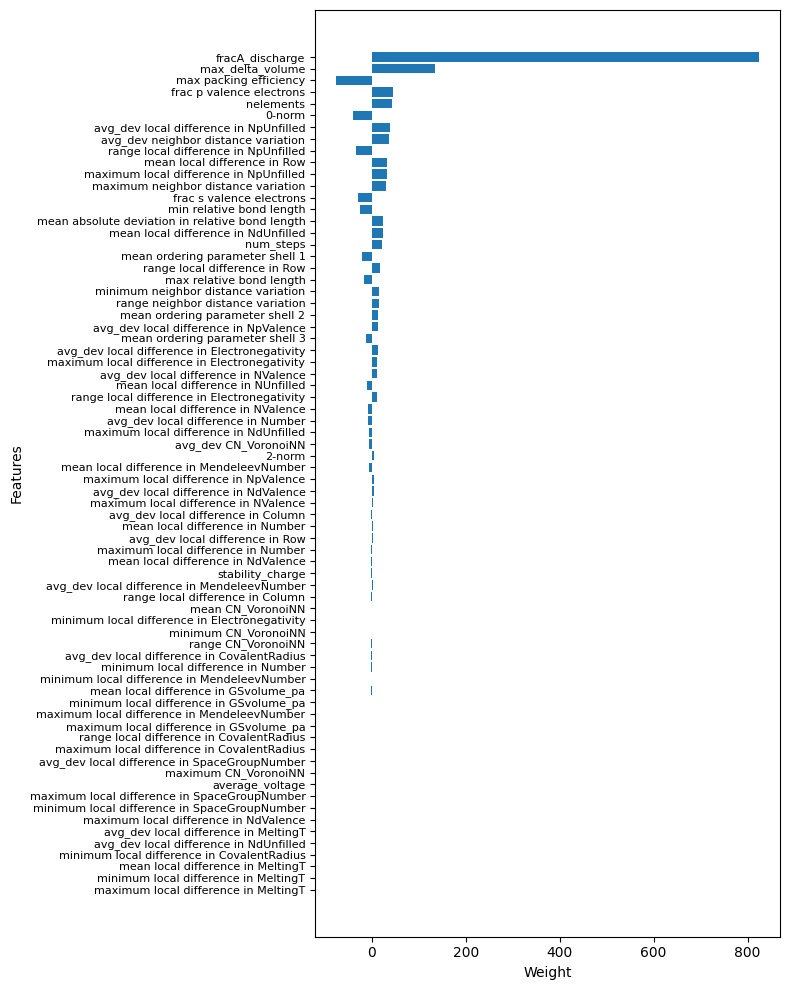

In [ ]:
# 棒グラフによるモデルの重みの可視化

import matplotlib.pyplot as plt

# データフレームの列名と重み係数を取得
columns = df_num.drop(target, axis=1).columns.tolist()
weights = ridge.coef_

# データを重み係数で降順にソート
sorted_data = sorted(zip(columns, weights), key=lambda x: abs(x[1]))
sorted_columns, sorted_weights = zip(*sorted_data)

# プロットを作成
plt.figure(figsize=(8, 10))  # グラフのサイズを調整
plt.barh(y=sorted_columns, width=sorted_weights)

# ラベルの設定
plt.xlabel('Weight')  # x軸ラベル
plt.ylabel('Features')  # y軸ラベル

# 軸の設定
plt.yticks(fontsize=8)  # y軸の文字サイズを調整

plt.tight_layout()
plt.show()

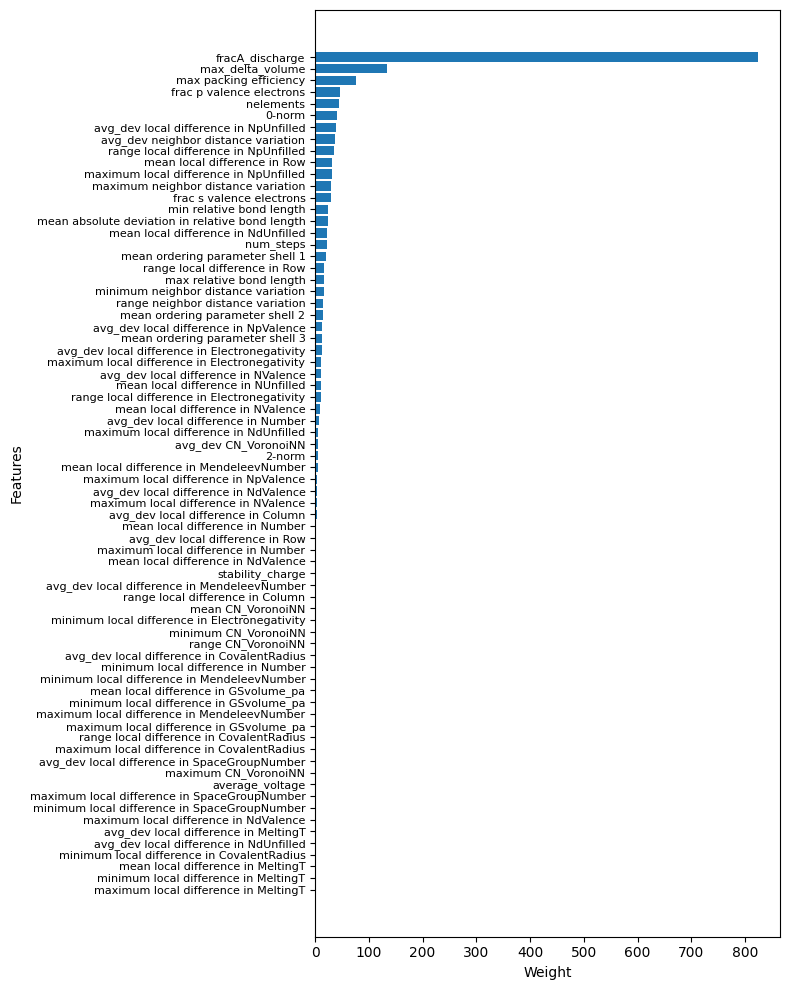

In [ ]:
# 棒グラフによるモデルの重みの絶対値の可視化

# データフレームの列名と重み係数を取得
columns = df_num.drop(target, axis=1).columns.tolist()
weights = abs(ridge.coef_)

# データを重み係数で降順にソート
sorted_data = sorted(zip(columns, weights), key=lambda x: abs(x[1]))
sorted_columns, sorted_weights = zip(*sorted_data)

# プロットを作成
plt.figure(figsize=(8, 10))  # グラフのサイズを調整
plt.barh(y=sorted_columns, width=sorted_weights)

# ラベルの設定
plt.xlabel('Weight')  # x軸ラベル
plt.ylabel('Features')  # y軸ラベル

# 軸の設定
plt.yticks(fontsize=8)  # y軸の文字サイズを調整

plt.tight_layout()
plt.show()

## 重みの大きな変数
- fracA_discharge
- max_delta_volume
- max packing efficiency
- frac p valence electrons
- nelements
- 0-norm
- avg_dev local difference in NpUnfilled
- avg_dev neighbor distance variation
- range local difference in NpUnfilled
- mean local difference in Row


In [ ]:
# 電荷量の重量比の散布図と相関係数を算出する関数
def corr_plot(column_name, target):
    r, pvalue = stats.pearsonr(df[column_name], df[target])
    print(f'相関係数：{r}')
    print(f'p値{pvalue:.3f}')

    if pvalue > 0.05:
        print("母相関係数は0であるため、相関があるとは言えない")
    else:
        print("母相関係数は0ではないため、相関がある")

    plt.scatter(x=df[column_name], y=df[target])
    plt.xlabel(column_name)
    plt.ylabel(target)
    plt.title("Scatter Plot of {} vs {}".format(column_name, target))
    plt.show()

相関係数：0.5422359457877547
p値0.000
母相関係数は0ではないため、相関がある


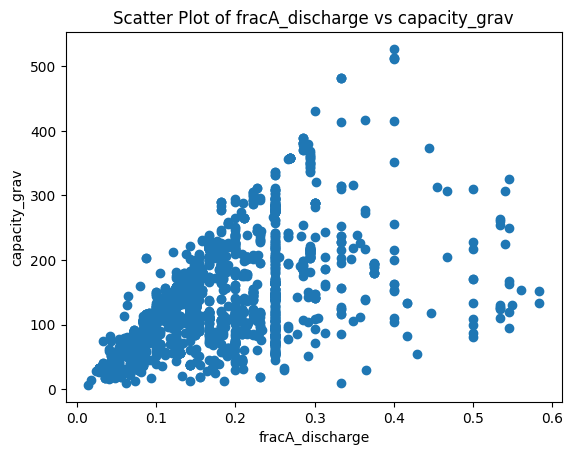

In [ ]:
# 放電時のLiイオンの割合と電荷量の重量比の散布図
corr_plot("fracA_discharge", target)

相関係数：0.4743234522177128
p値0.000
母相関係数は0ではないため、相関がある


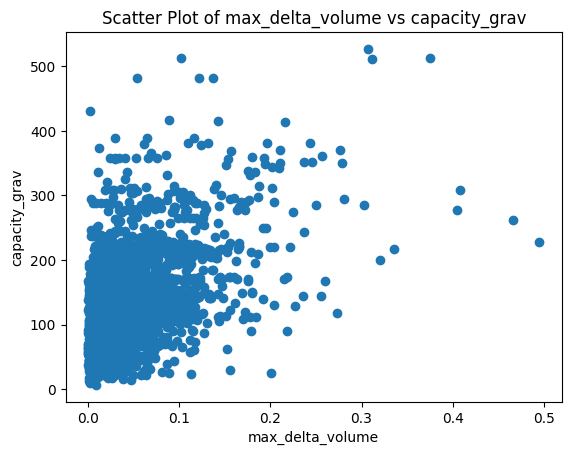

In [ ]:
# 各空間のセルサイズの変動値の最大値と電荷量の重量比の散布図
corr_plot("max_delta_volume", target)

相関係数：-0.034180176775870055
p値0.095
母相関係数は0であるため、相関があるとは言えない


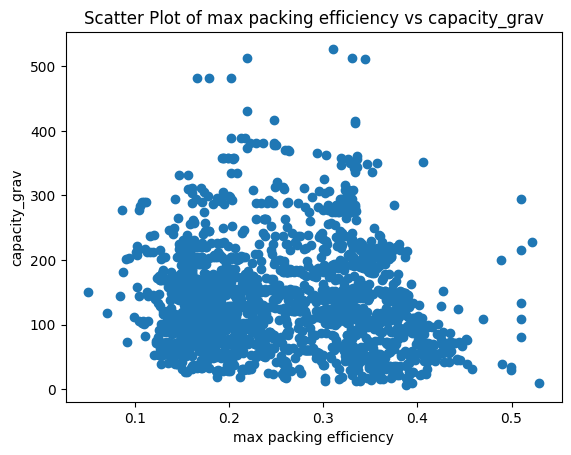

In [ ]:
# どれだけ原子を効率的に詰め込んでいるかと電荷量の重量比の散布図
corr_plot("max packing efficiency", target)

相関係数：0.09214259739458867
p値0.000
母相関係数は0ではないため、相関がある


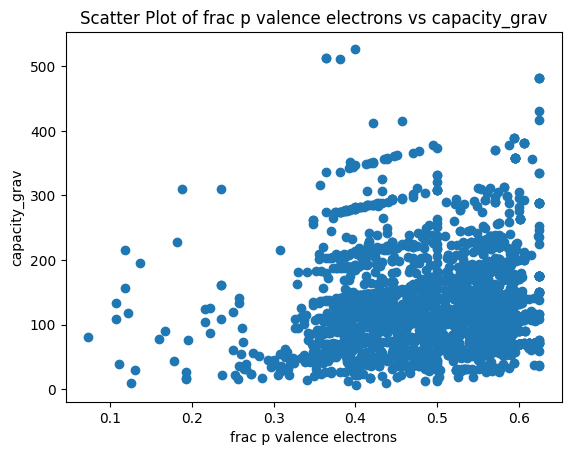

In [ ]:
# p軌道の電子の割合と電荷量の重量比の散布図
corr_plot("frac p valence electrons", target)

相関係数：-0.12006570573485419
p値0.000
母相関係数は0ではないため、相関がある


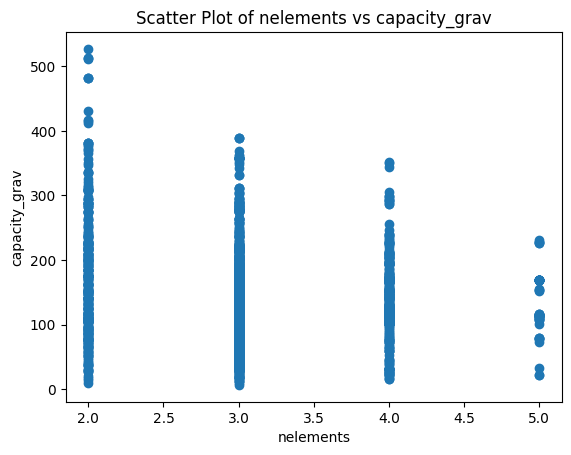

In [ ]:
# 原子の数と電荷量の重量比の散布図
corr_plot("nelements", target)

相関係数：-0.16165086083870667
p値0.000
母相関係数は0ではないため、相関がある


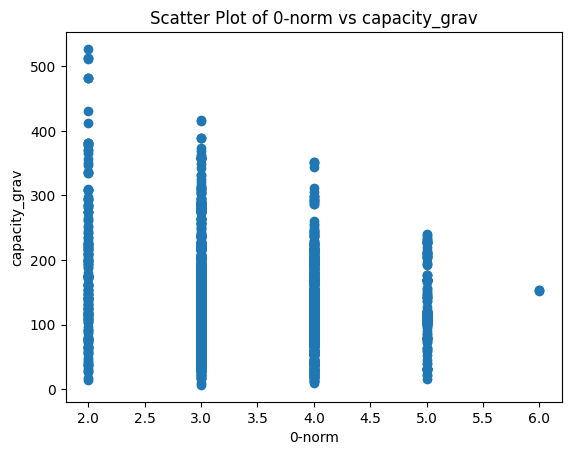

In [ ]:
# 0-normと電荷量の重量比の散布図
corr_plot("0-norm", target)

相関係数：0.17788366006053727
p値0.000
母相関係数は0ではないため、相関がある


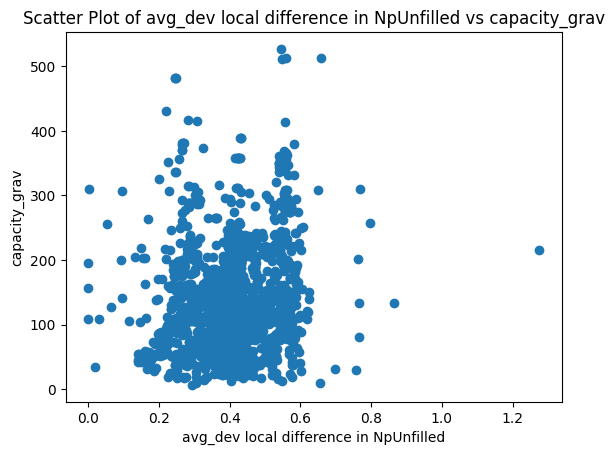

In [ ]:
# 埋まっていないp軌道の電子の数の平均絶対偏差と電荷量の重量比の散布図
corr_plot("avg_dev local difference in NpUnfilled", target)

相関係数：0.090740907399959
p値0.000
母相関係数は0ではないため、相関がある


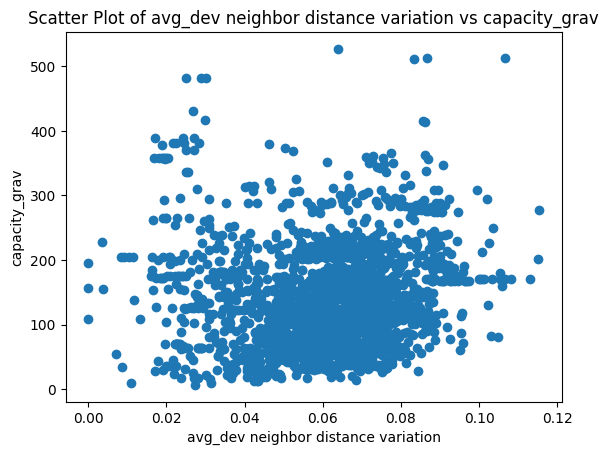

In [ ]:
# 各原子のすべての隣接原子の隣接距離の平均絶対偏差と電荷量の重量比の散布図
corr_plot("avg_dev neighbor distance variation", target)

相関係数：-0.09398738135121092
p値0.000
母相関係数は0ではないため、相関がある


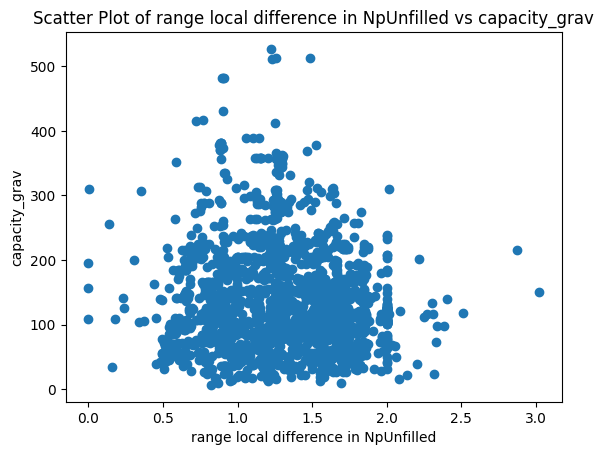

In [ ]:
# 埋まっていないp軌道の数の取りうる範囲と電荷量の重量比の散布図
corr_plot("range local difference in NpUnfilled", target)

相関係数：-0.20378339572590973
p値0.000
母相関係数は0ではないため、相関がある


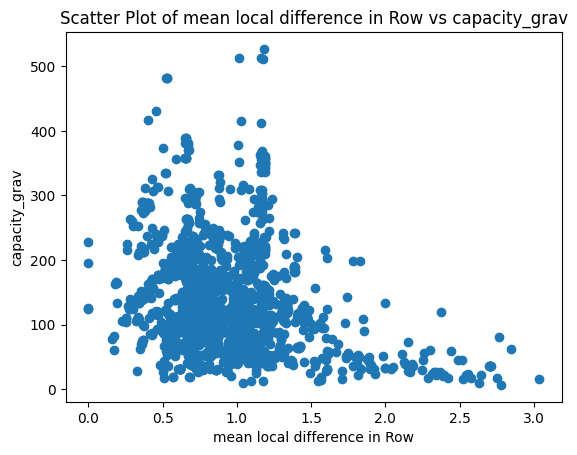

In [ ]:
# 縦方向の平均と電荷量の重量比の散布図
corr_plot("mean local difference in Row", target)

上記より下記の要素が電荷量の重量比と相関がある
- 放電時のLiイオンの割合
- 各空間のセルサイズの変動値の最大値
- p軌道の電子の割合
- 原子の数
- 0-norm
- 埋まっていないp軌道の電子の数の平均絶対偏差
- 各原子のすべての隣接原子の距離の平均絶対偏差
- 埋まっていないp軌道の電子の数の取りうる範囲
- 縦方向の平均




In [ ]:
# SHAPによる可視化
explainer = shap.Explainer(ridge.predict, x_train, feature_names=df_num.drop(labels=[target], axis=1).columns.tolist())
shap_values = explainer(x_test)

PermutationExplainer explainer: 480it [00:24, 14.67it/s]                         


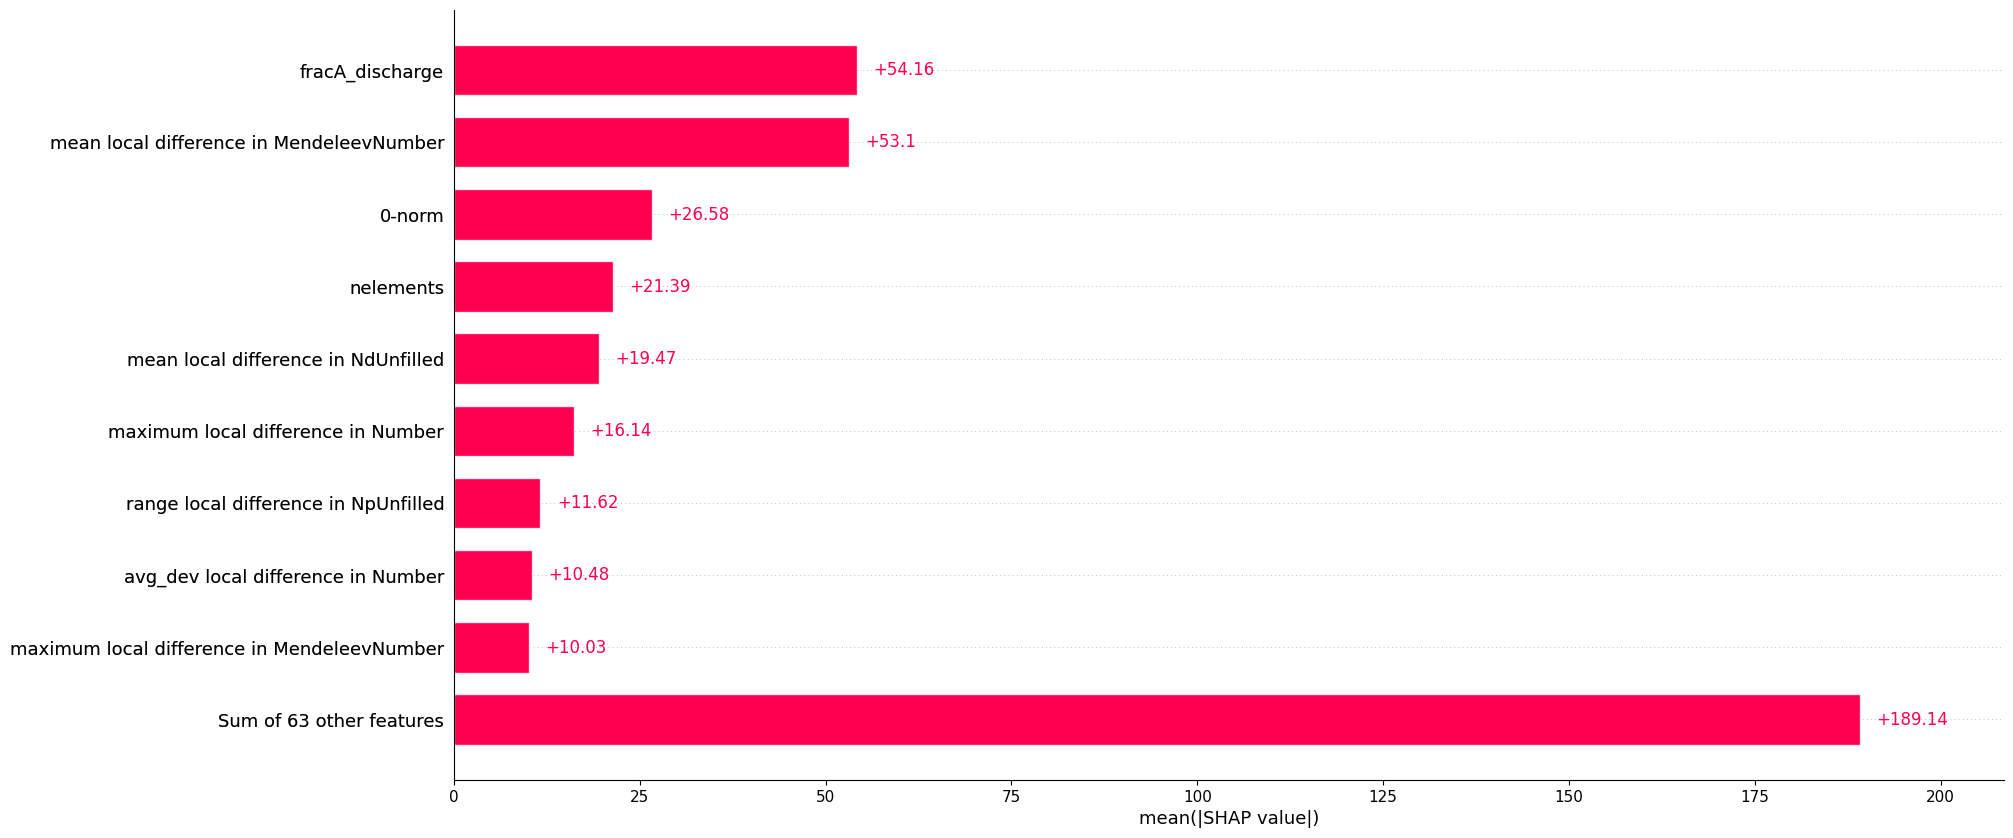

In [ ]:
shap.initjs()

shap.plots.bar(shap_values, show=False)

plt.gcf().set_size_inches(20, 10)

相関係数：-0.07503534495829738
p値0.000
母相関係数は0ではないため、相関がある


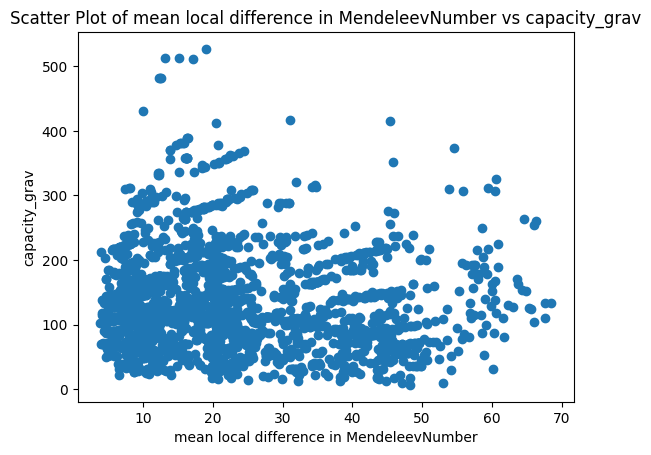

In [ ]:
# 各原子のメンデレーフ数の差の平均値と電荷量の重量比の散布図
corr_plot("mean local difference in MendeleevNumber", target)

相関係数：0.01928460174577623
p値0.346
母相関係数は0であるため、相関があるとは言えない


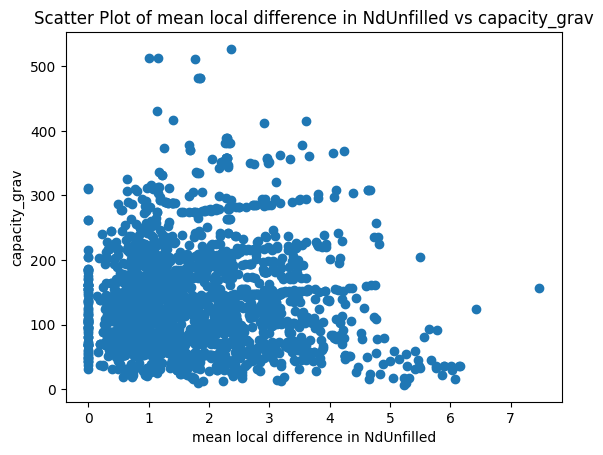

In [ ]:
# d軌道の埋まっていない電子の平均値と電荷量の重量比の散布図
corr_plot("mean local difference in NdUnfilled", target)

相関係数：-0.2574180853355702
p値0.000
母相関係数は0ではないため、相関がある


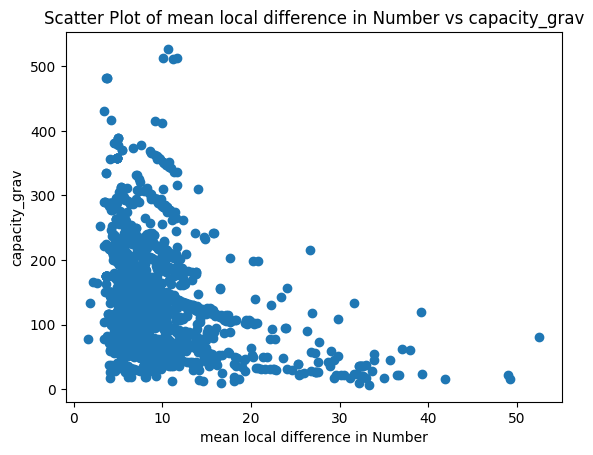

In [ ]:
# 近傍の原子番号の差の平均と電荷量の重量比の散布図
corr_plot("mean local difference in Number", target)

相関係数：-0.16075471870469654
p値0.000
母相関係数は0ではないため、相関がある


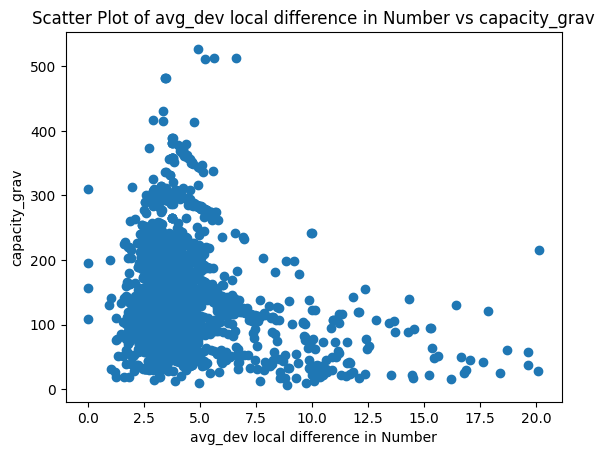

In [ ]:
# 近傍の原子番号の差の平均絶対偏差と電荷量の重量比の散布図
corr_plot("avg_dev local difference in Number", target)

相関係数：-0.10422580768726275
p値0.000
母相関係数は0ではないため、相関がある


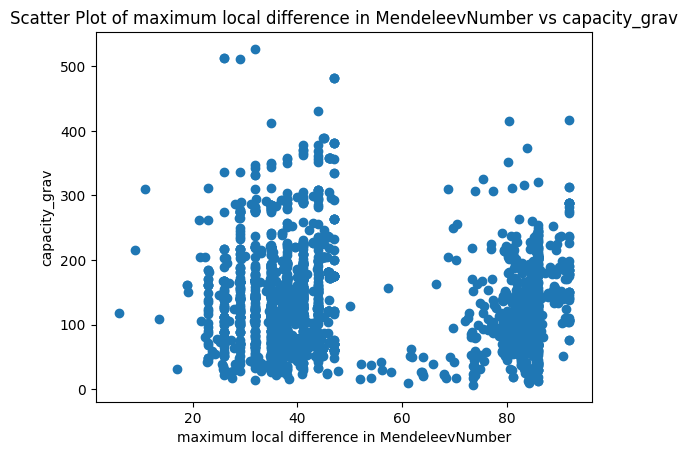

In [ ]:
# 近傍の原子のメンデレーエフ番号の最大値と電荷量の重量比の散布図
corr_plot("maximum local difference in MendeleevNumber", target)

## SHAPで新たに重要度が高かった以下の変数は電荷量の重量比と相関がある

- 近傍の原子のメンデレーエフ番号の平均値
- 近傍の原子のメンデレーエフ番号の最大値
- 近傍の原子の原子番号の差の平均値
- 近傍の原子の原子番号の差の絶対平均偏差

回帰モデルの重み及びSHAP値で以下の変数が重要度が高かった
- fracA_discharge : 放電時のLiイオンの割合
- 0-norm
- nelements : 原子の数
- range local difference in NpUnfilled : 埋まっていないp軌道の電子の数の取りうる範囲

## これまでの変数から以下のカテゴリに分割できると考えられる

####空間に関する変数
- 各原子のすべての隣接原子の距離の平均絶対偏差
- 各空間のセルサイズの変動値の最大値
- 縦方向の差の平均
- 原子の数
- 埋まっていないp軌道の電子の数の平均絶対偏差
- 埋まっていないp軌道の電子の数の取りうる範囲

#### 元素が周期表の中でどの位置にあるか
- 近傍の原子のメンデレーエフ番号の平均値
- 近傍の原子のメンデレーエフ番号の最大値
- 近傍の原子の原子番号の差の平均値
- 近傍の原子の原子番号の差の絶対平均偏差

#### ノルム
- 0-norm


#### 電荷に関するもの
- 放電時のLiイオンの割合
- p軌道の電子の割合
